In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from mpl_toolkits.basemap import Basemap

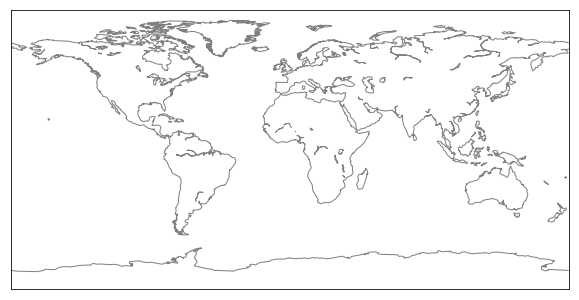

In [3]:
fig = plt.figure(figsize=(10, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawcoastlines(color='gray')

* Import cluster data

In [4]:
import pickle
import seaborn as sns

In [5]:
centroid_images = pickle.load(open('../models/centroids_images.pickle','rb'))

In [6]:
clustering_labels = pickle.load(open('../models/cluster_labels_images.pickle','rb'))

In [7]:
my_palette = pickle.load(open('../models/cluster_palette_images.pickle','rb'))

* Convert centroids from UTM to lat/lon

In [8]:
from pyproj import Proj, transform

In [9]:
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')

In [14]:
lats = []
lons = []
for c in centroid_images:
    lat,lon = transform(inProj,outProj,c[0],c[1])
    lats.append(lat)
    lons.append(lon)

In [22]:
clustering_colours = []
for l in clustering_labels:
    clustering_colours.append(my_palette[l])

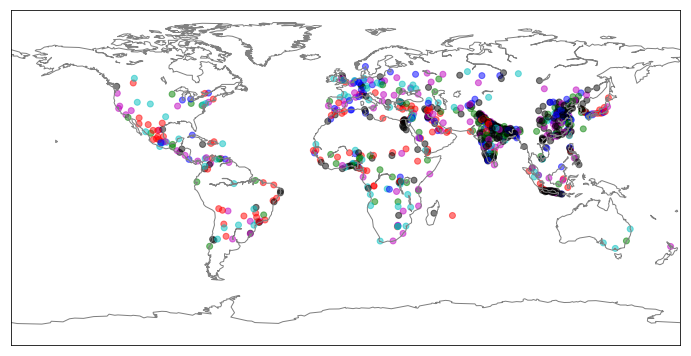

In [25]:
fig = plt.figure(figsize=(12, 8), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawcoastlines(color='gray')
m.scatter(lats, lons, latlon=True,
          c=clustering_colours,
          cmap='Reds', alpha=0.5)
plt.savefig('../reports/map_clusters6.png',dpi=400, bbox_inches='tight')
# ax = sns.scatterplot(lats,lons, hue=clustering_labels, palette = my_palette)
# ax.legend().set_visible(False)

* The same for **three** clusters

In [26]:
clustering_labels = pickle.load(open('../models/cluster3_labels_images.pickle','rb'))
my_palette = pickle.load(open('../models/cluster3_palette_images.pickle','rb'))

In [27]:
clustering_colours = []
for l in clustering_labels:
    clustering_colours.append(my_palette[l])

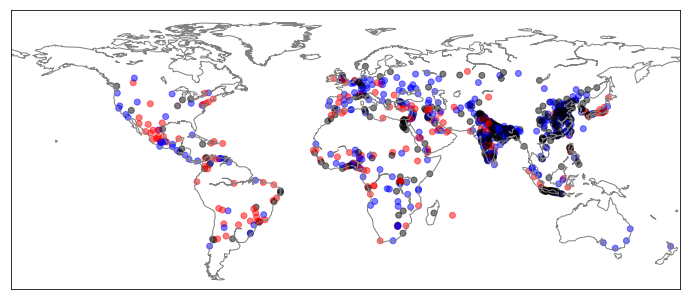

In [40]:
fig = plt.figure(figsize=(12, 8), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawcoastlines(color='gray')
m.scatter(lats, lons, latlon=True,
          c=clustering_colours,
          cmap='Reds', alpha=0.5)
plt.ylim([-60,90])
plt.gca().get_ylim()
plt.savefig('../reports/map_clusters3_v2.png',dpi=400, bbox_inches='tight')

In [9]:
import utm

In [12]:
utm.from_latlon(51.2, -7.5)

(604798.6896188697, 5673135.241182375, 29, 'U')

In [16]:
lats = []
lons = []
for c in centroid_images[0:10]:
    utm.to_latlon(c[0], c[1], 32, 'U')

OutOfRangeError: easting out of range (must be between 100.000 m and 999.999 m)

In [8]:
centroid_images

array([[1282359.22589498,  429815.41686593],
       [3961353.36236806, 4012446.53184285],
       [ -15801.61489066, 6718193.8540096 ],
       ...,
       [8120857.53336577, 2317693.48342582],
       [-126418.46457164, 6914618.920445  ],
       [-179831.36825374,  745237.42853027]])

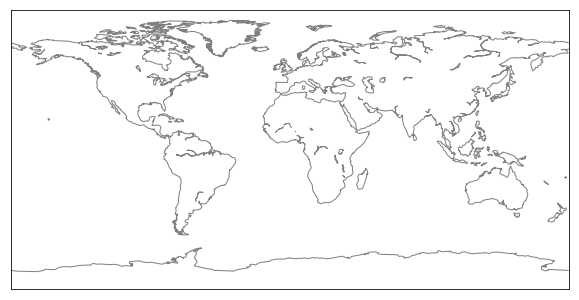

In [14]:
fig = plt.figure(figsize=(10, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawcoastlines(color='gray')
# plt.scatter(centroid_images[:,0],centroid_images[:,1])
# ax = sns.scatterplot(centroid_images[:,0],centroid_images[:,1], hue=clustering_labels, palette = my_palette)
# ax.legend().set_visible(False)

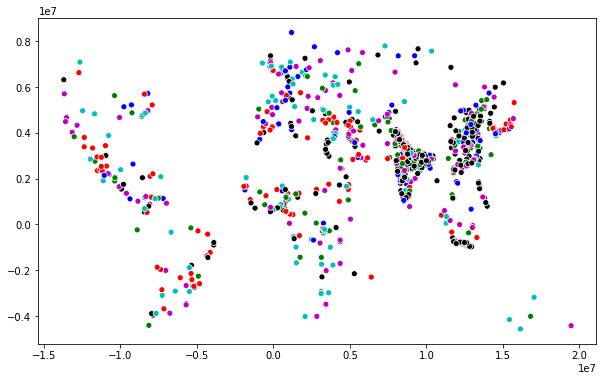

In [15]:
fig = plt.figure(figsize=(10, 6), edgecolor='w')
ax = sns.scatterplot(centroid_images[:,0],centroid_images[:,1], hue=clustering_labels, palette = my_palette)
ax.legend().set_visible(False)